<a href="https://colab.research.google.com/github/ZBHlily/Summer22-MicroCredential/blob/main/Advertising_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Identify the problem 

The aim for this analysis is to conduct an analysis to indicate whether or not a particular user clicked on an Advertisement.



# Task 2: Load the Libraries

In [83]:
# importing libaries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import plotly
import cufflinks as cf
cf.go_offline()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Task 3: Load the data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/ZBHlily/Summer22-MicroCredential-Data/main/advertising.csv')

# Task 4: EDA ( Exploratory Data Analysis )


In [ ]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
df.isnull()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().value_counts()

Daily Time Spent on Site  Age    Area Income  Daily Internet Usage  Ad Topic Line  City   Male   Country  Timestamp  Clicked on Ad
False                     False  False        False                 False          False  False  False    False      False            1000
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


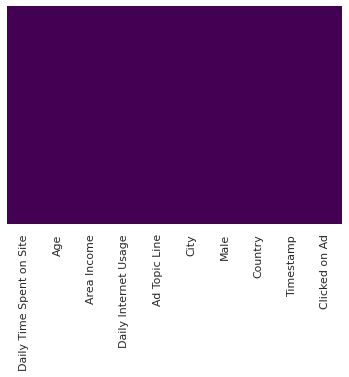

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap='viridis')

# Task 5: Data Visualization

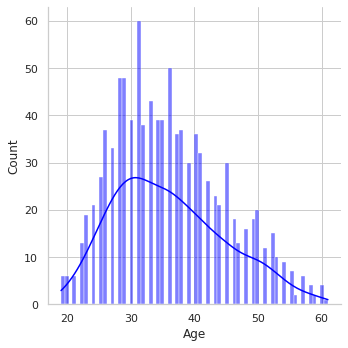

In [ ]:
# sns.set_style('whitegrid')
sns.displot(df['Age'].dropna(), kde= True, color = 'blue', bins = 70) # graphing the ages within the dataset

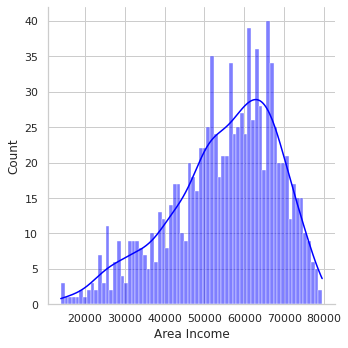

In [ ]:
sns.displot(df['Area Income'].dropna(), kde= True, color = 'blue', bins = 70) # graphing the income within the dataset

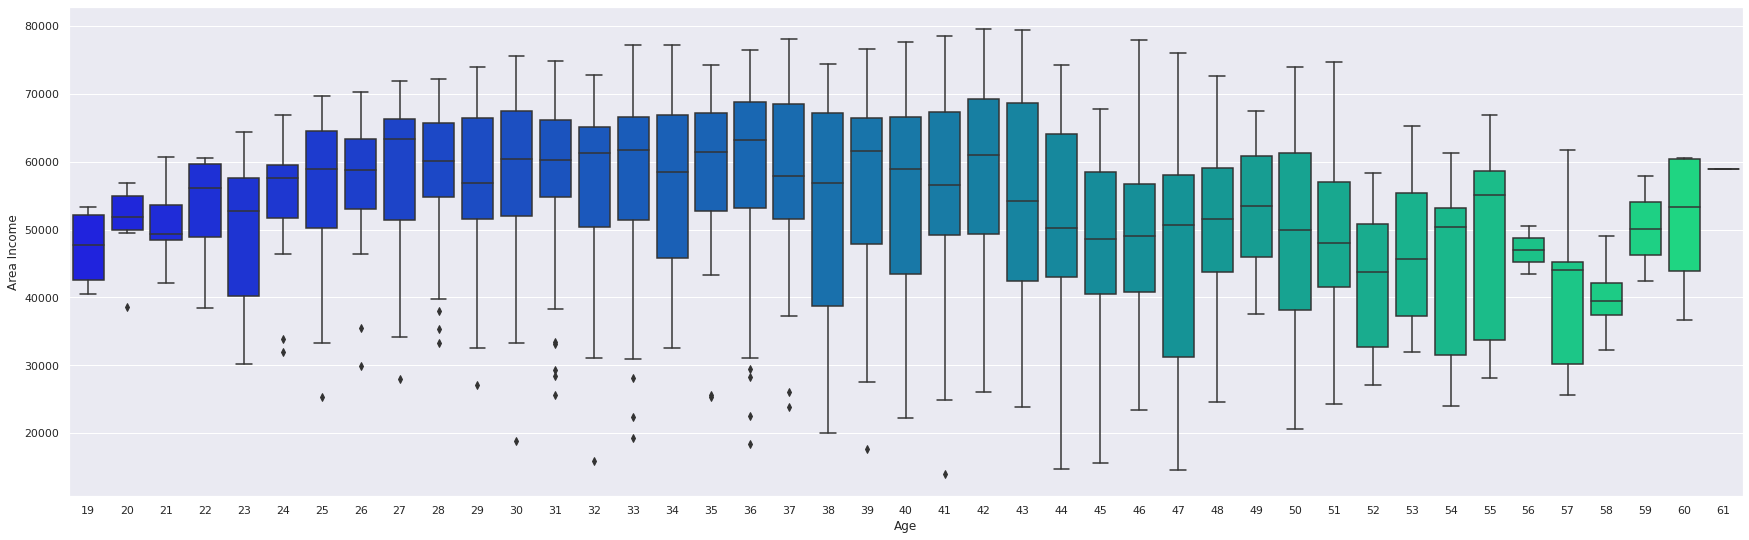

In [84]:
plt.figure(figsize=(30, 9))
sns.boxplot(x = 'Age', y = 'Area Income', data = df, palette = 'winter') # scatterplot of age and income

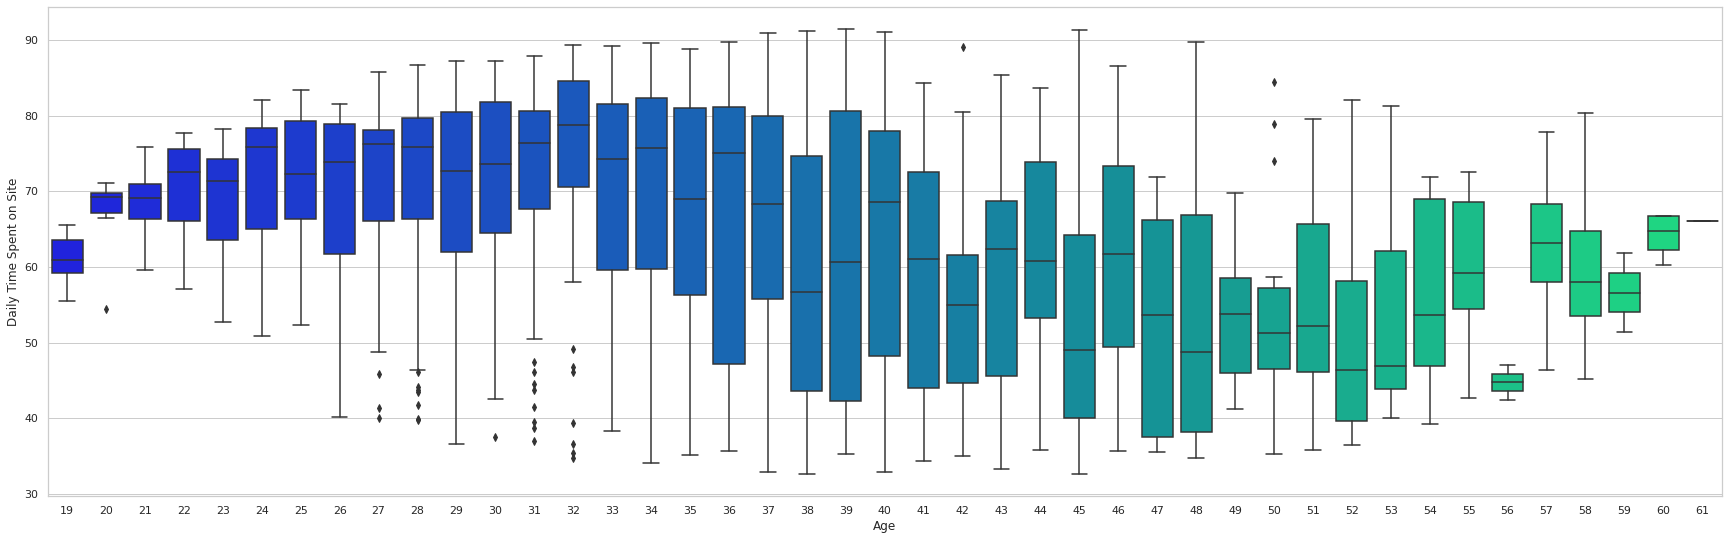

In [ ]:
plt.figure(figsize=(30, 9))
sns.boxplot(x = 'Age', y = 'Daily Time Spent on Site', data = df, palette = 'winter')  # scatterplot of age and daily time spent on site

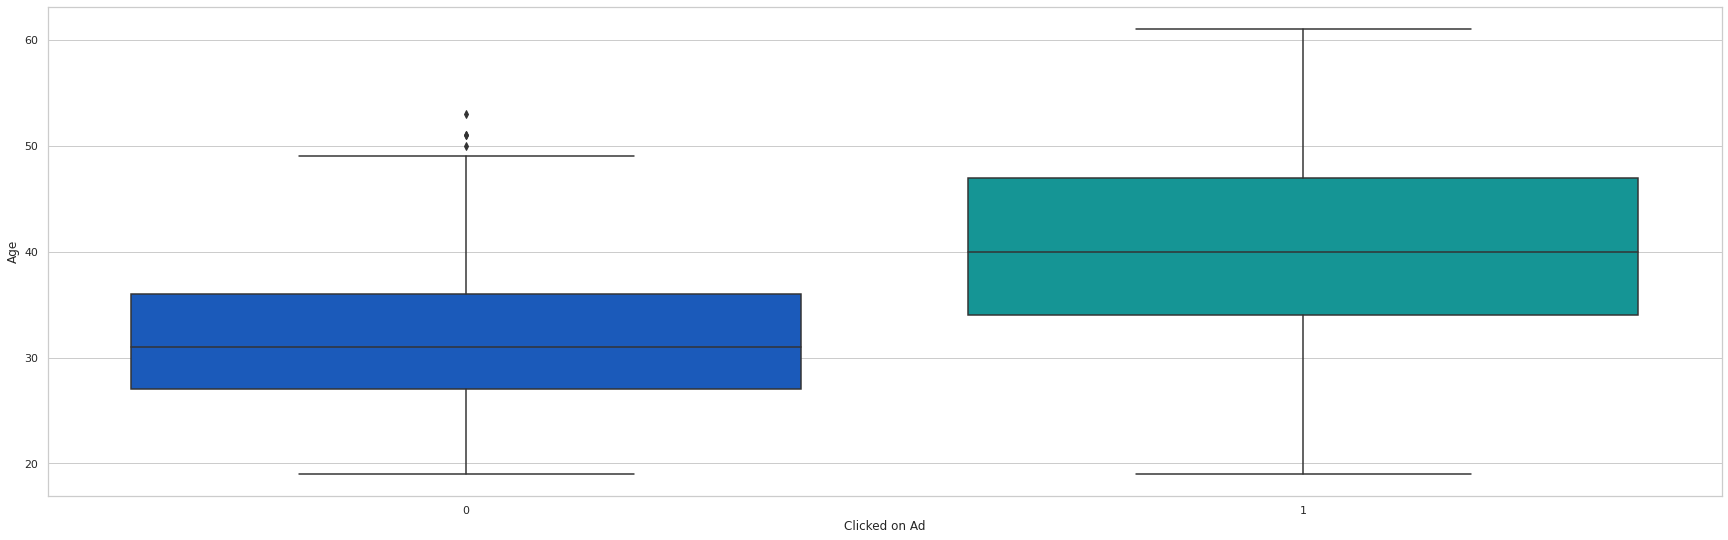

In [ ]:
plt.figure(figsize=(30, 9))
sns.boxplot(y = 'Age', x = 'Clicked on Ad', data = df, palette = 'winter')  # scatterplot of age and how many times they clicked on an ad

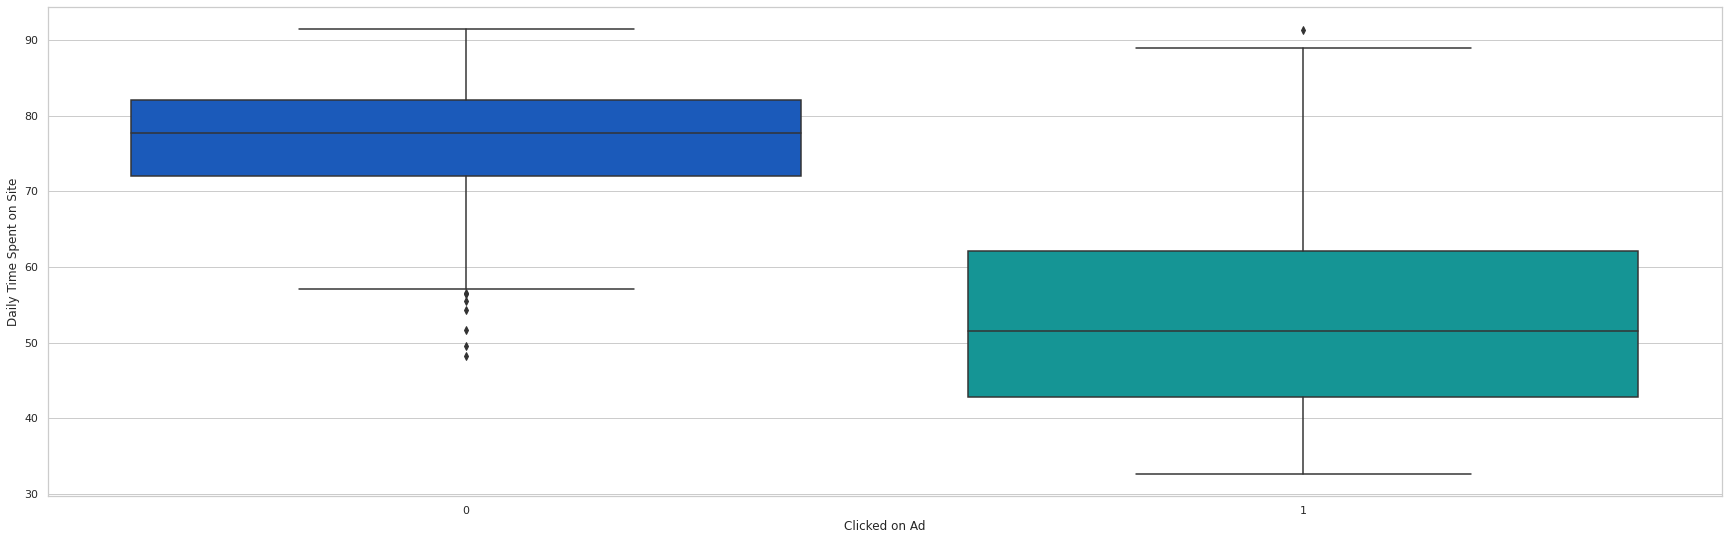

In [ ]:
plt.figure(figsize=(30, 9))
sns.boxplot(x = 'Clicked on Ad', y = 'Daily Time Spent on Site', data = df, palette = 'winter')

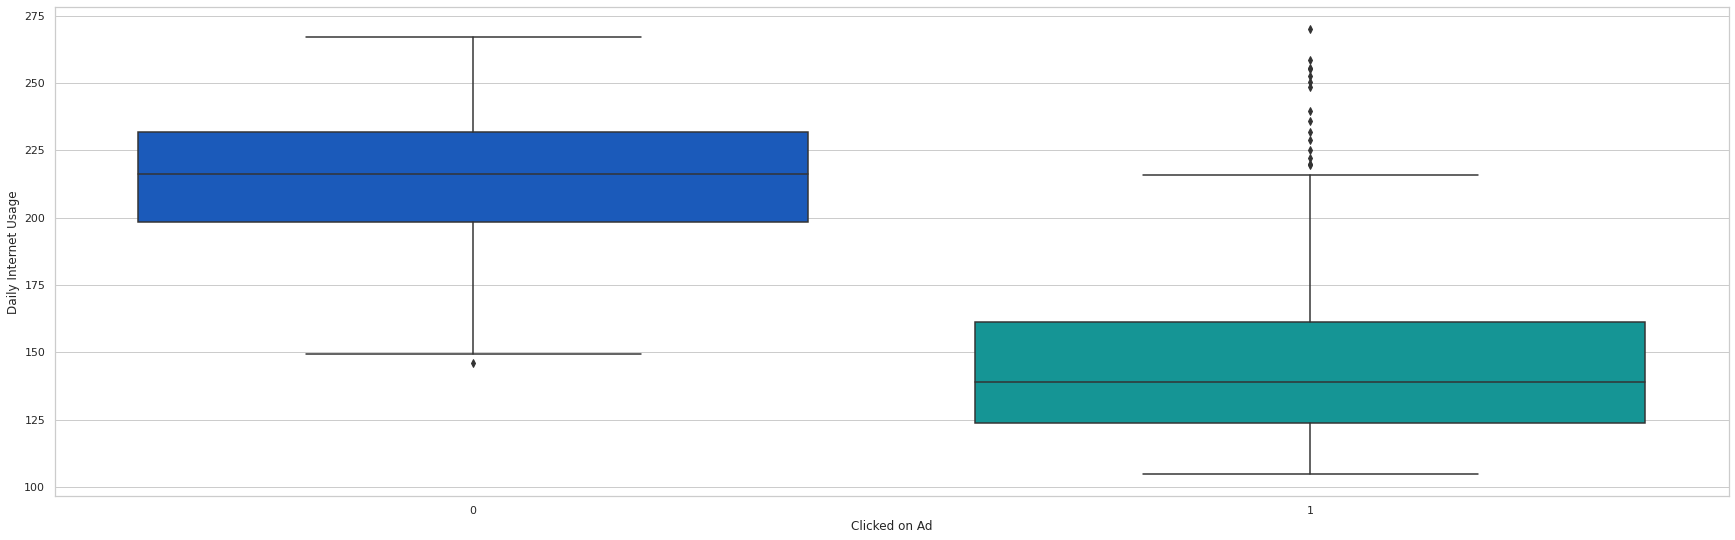

In [ ]:
plt.figure(figsize=(30, 9))
sns.boxplot(x = 'Clicked on Ad', y = 'Daily Internet Usage', data = df, palette = 'winter')

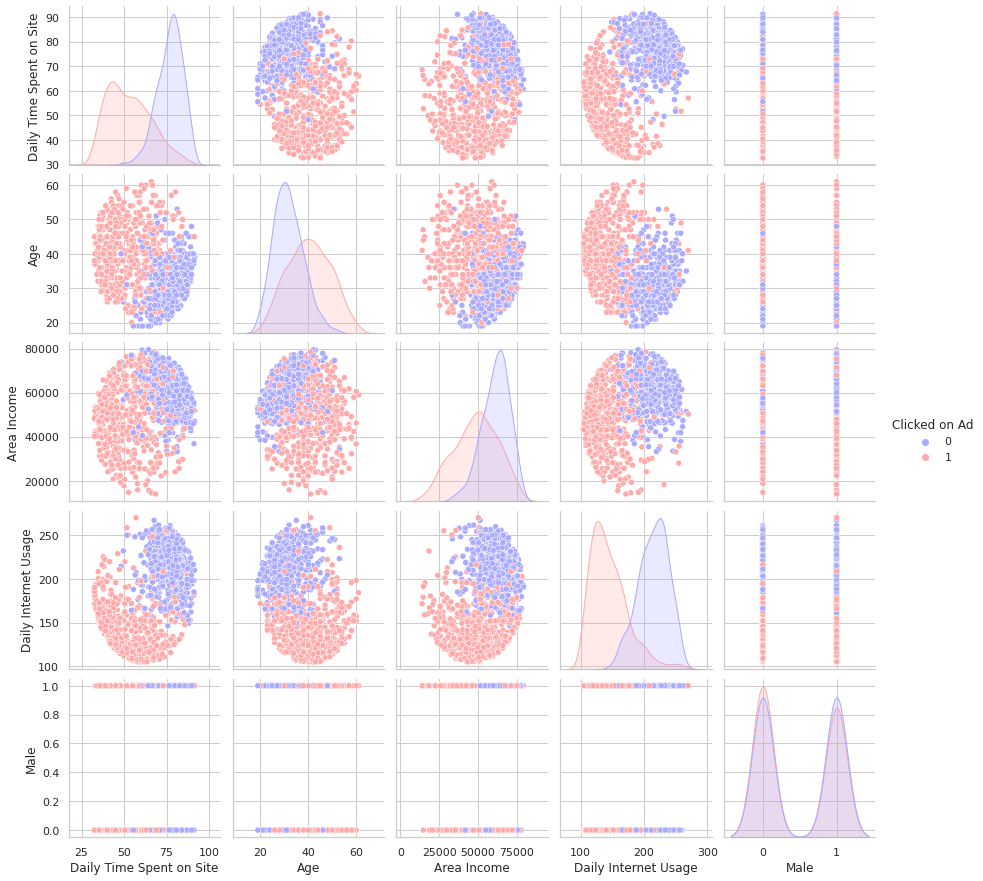

In [ ]:
sns.pairplot(df,  hue = 'Clicked on Ad', palette='bwr') # plotting clicked on add with every other axis 

# Task 6: Compute the cost Function

At this time, none needed

# Task 7: Compute the Gradient Descent

At this time, none needed

# Task 8: Visualizing the Cost Function

At this time, none needed

# Task 9: Conduct the linear regression on the data

In [55]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']] # creating the columns that are necessary for training
y = df['Clicked on Ad']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [58]:
model = LogisticRegression()

In [66]:
s = StandardScaler() # removing the mean and scaling to unit variance

In [67]:
X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)

In [68]:
model.fit(X_train, y_train) # fitting the model

LogisticRegression()

# Task 10: Making Predictions

In [85]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0])

In [72]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [82]:
print("Prediction accuracy is:", + model.score(X_test, y_test)*100)
pp = model.predict(X_test)
# print(pp)
print('Number of people to click an ad is:', sum(pp!=0))
print('Number of people to not click an ad is:', sum(pp==0))
# print(accuracy_score(y_test,predictions))
# this model seems to be overfitting

Prediction accuracy is: 98.0
Number of people to click an ad is: 111
Number of people to not click an ad is 139
